# Keane and Wolpin (1997)

*Note that most of the code cells are hidden from this notebook for a better reading flow. Check out the notebook in the documentation folder in the Github repository for more details.*

In the following, we will replicate the base and extended model from Keane and Wolpin (1997) and present occupational choice of agents over 40 periods.

In [1]:
%matplotlib agg

import respy as rp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../_static/respy.mplstyle")

In [3]:
params, options = rp.get_example_model("kw_97_base", with_data=False)

simulate = rp.get_simulate_func(params, options)
df = simulate(params)

/data/homes/iza25808/respy/respy/pre_processing/model_processing.py:154: UserWarning: The shares of initial experiences for choice 'edu' do not sum to one. Shares are divided by their sum for normalization.
  category=UserWarning,


In [4]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts(normalize=True).unstack()[["home", "edu", "a", "b", "mil"]]

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "White-Collar", "Blue-Collar", "Military"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, options["n_periods"], 5))
ax.set_xticklabels(range(0, options["n_periods"], 5), rotation="horizontal")

ax.set_ylabel("Share of population");

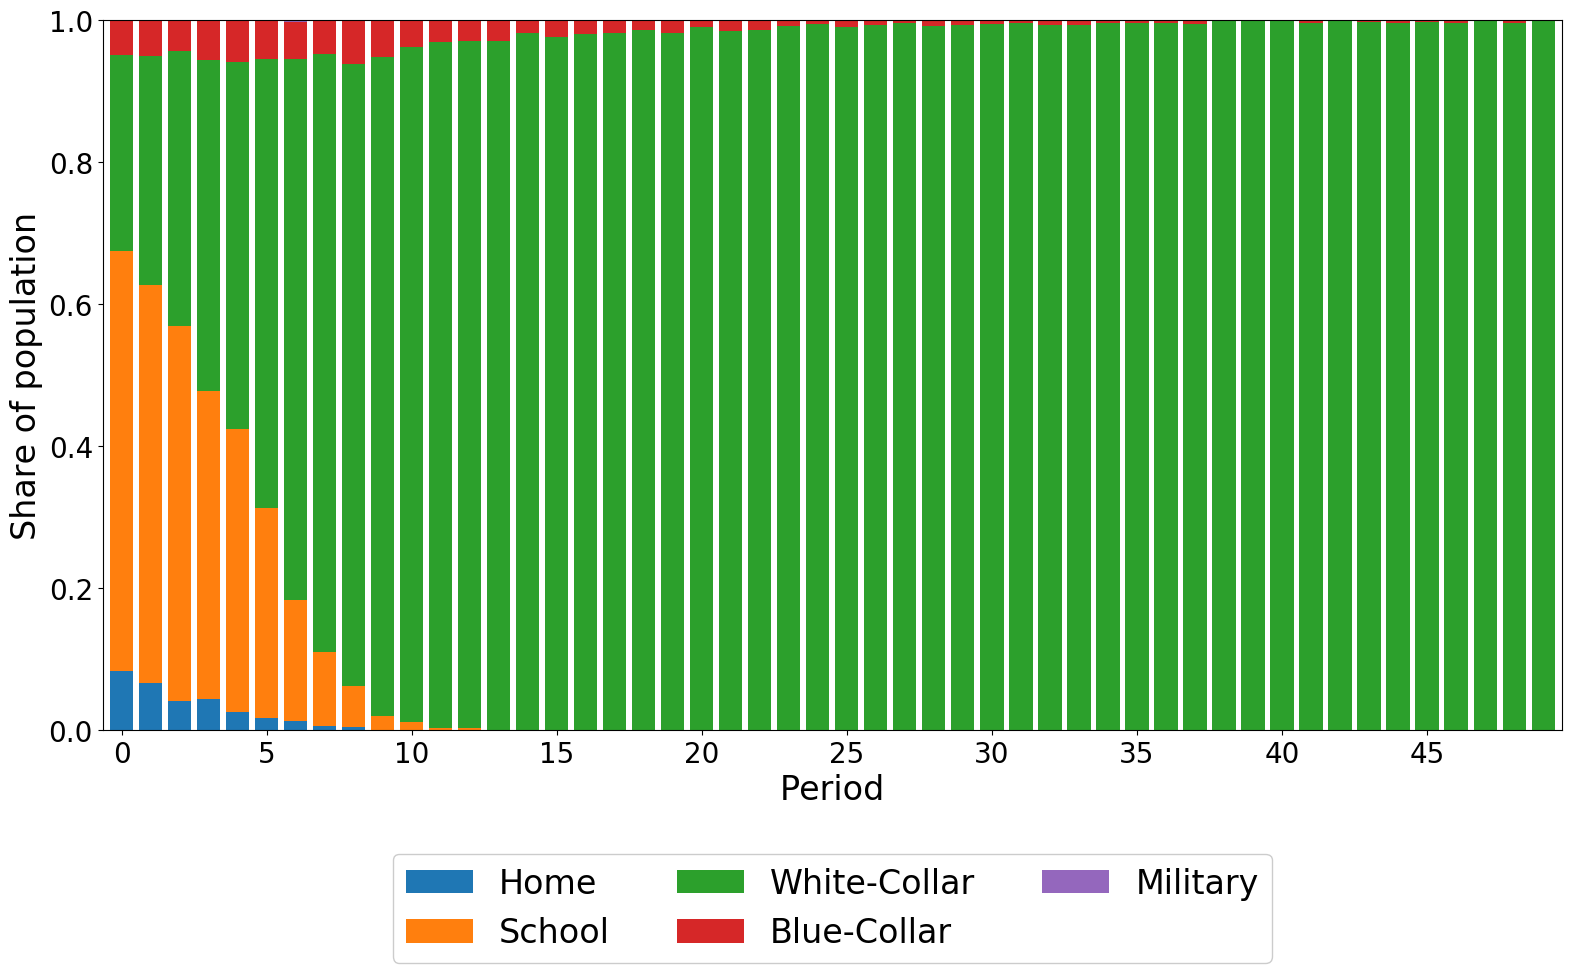

In [5]:
fig

In [6]:
params, options = rp.get_example_model("kw_97_extended", with_data=False)

simulate = rp.get_simulate_func(params, options)
df = simulate(params)

/data/homes/iza25808/respy/respy/pre_processing/model_processing.py:154: UserWarning: The shares of initial experiences for choice 'edu' do not sum to one. Shares are divided by their sum for normalization.
  category=UserWarning,


In [7]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts(normalize=True).unstack()[["home", "edu", "a", "b", "mil"]]

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "White-Collar", "Blue-Collar", "Military"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, options["n_periods"], 5))
ax.set_xticklabels(range(0, options["n_periods"], 5), rotation="horizontal")

ax.set_ylabel("Share of population");

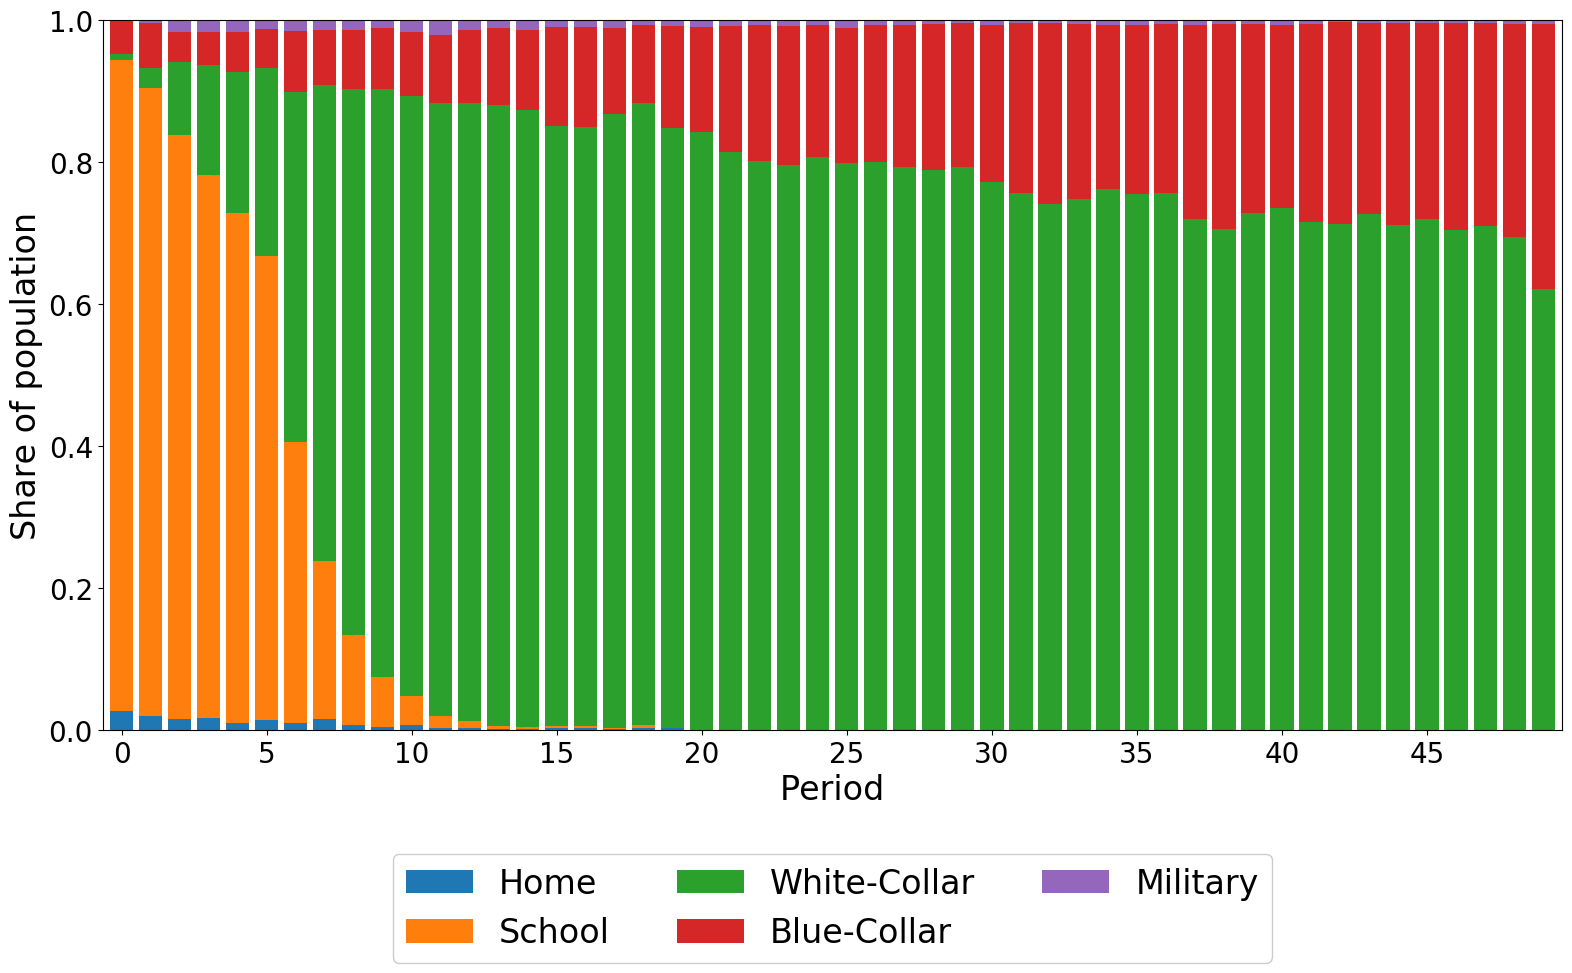

In [8]:
fig